# **Importing Libraries**


In [ ]:
import pandas as pd
df = pd.read_csv('shopping_trends01.csv')


In [ ]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing**

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,NaN,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Input and Output Variables

In [ ]:
print("Input Variables=", set(df.columns)- set(['Subscription Status']))
print("Output Variable=", set(['Subscription Status']))

Input Variables= {'Season', 'Color', 'Review Rating', 'Size', 'Promo Code Used', 'Age', 'Payment Method', 'Preferred Payment Method', 'Gender', 'Discount Applied', 'Item Purchased', 'Customer ID', 'Shipping Type', 'Purchase Amount (USD)', 'Location', 'Frequency of Purchases', 'Previous Purchases', 'Category'}
Output Variable= {'Subscription Status'}


Rows and Columns

In [ ]:
print("Shape=",df.shape)
print("Number of Rows=",df.shape[0])
print("Number of Columns=",df.shape[1])

#This dataset has 3900 rows and 19 columns

Shape= (3900, 19)
Number of Rows= 3900
Number of Columns= 19


Columns Present in the dataset

In [ ]:
df.columns
#Total = 19 columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
input_var= set(df.columns)-set(['Subscription Status'])
X=df[input_var]
Y=df['Subscription Status']

# 'Subscription Stauts' is the output or target variable. Remaining are input variables

# Eliminating target variable from input

<ipython-input-9-9e4c32e6a536>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=df[input_var]


Categorical Variables

In [ ]:
df.select_dtypes(include=object).columns
#14 out of 19 are Categorical variables

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

Numerical Variables

In [ ]:
df.select_dtypes(exclude=object).columns
# 5 Numerical Variables

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

Number of missing values in each column

In [ ]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      2
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               2
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            2
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Percentage of Missing Values

In [ ]:
missing=(df.isnull().mean())*100

column_names=['Percentage of Missing Value']

missing_percentage_values= pd.DataFrame(missing,columns=column_names )

missing_percentage_values

,Percentage of Missing Value
Customer ID,0.000000
Age,0.000000
Gender,0.051282
Item Purchased,0.000000
Category,0.000000
Purchase Amount (USD),0.000000
Location,0.000000
Size,0.000000
Color,0.000000
Season,0.000000


Standard Deviation

In [ ]:
df.std()==0
# None of the variables are observed to have zero standard deviation

<ipython-input-14-834a77524c64>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()==0


Customer ID              False
Age                      False
Purchase Amount (USD)    False
Review Rating            False
Previous Purchases       False
dtype: bool

Descriptive Analysis of Numerical Variables

In [ ]:
df.describe(exclude=['object'])

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3898.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750282,25.351538
std,1125.977353,15.207589,23.685392,0.716255,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.750000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Descriptive Analysis of Categorical Variables

In [ ]:
df.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3898,3900,3900,3900,3900,3900,3900,3900,3900,3900,3898,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2650,171,1737,96,1755,177,999,2847,696,675,2221,2223,677,584


In [ ]:
df.std()

<ipython-input-17-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Customer ID              1125.977353
Age                        15.207589
Purchase Amount (USD)      23.685392
Review Rating               0.716255
Previous Purchases         14.447125
dtype: float64

In [ ]:
df.mean()

<ipython-input-18-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Customer ID              1950.500000
Age                        44.068462
Purchase Amount (USD)      59.764359
Review Rating               3.750282
Previous Purchases         25.351538
dtype: float64

In [ ]:
df.median()

<ipython-input-19-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Customer ID              1950.50
Age                        44.00
Purchase Amount (USD)      60.00
Review Rating               3.75
Previous Purchases         25.00
dtype: float64

In [ ]:
df.quantile()

<ipython-input-20-431199b824ed>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile()


Customer ID              1950.50
Age                        44.00
Purchase Amount (USD)      60.00
Review Rating               3.75
Previous Purchases         25.00
Name: 0.5, dtype: float64

In [ ]:
df.quantile(0.25)

<ipython-input-21-29e18f3a7353>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.25)


Customer ID              975.75
Age                       31.00
Purchase Amount (USD)     39.00
Review Rating              3.10
Previous Purchases        13.00
Name: 0.25, dtype: float64

In [ ]:
df.quantile(0.75)

<ipython-input-22-396ba156e02a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)


Customer ID              2925.25
Age                        57.00
Purchase Amount (USD)      81.00
Review Rating               4.40
Previous Purchases         38.00
Name: 0.75, dtype: float64

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.000560,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.022113,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030985,0.008063
Review Rating,0.000560,-0.022113,0.030985,1.000000,0.004526
Previous Purchases,-0.039159,0.040445,0.008063,0.004526,1.000000


In [ ]:
df.select_dtypes(exclude=object).min()

Customer ID               1.0
Age                      18.0
Purchase Amount (USD)    20.0
Review Rating             2.5
Previous Purchases        1.0
dtype: float64

In [ ]:
df.select_dtypes(exclude=object).max()

Customer ID              3900.0
Age                        70.0
Purchase Amount (USD)     100.0
Review Rating               5.0
Previous Purchases         50.0
dtype: float64

In [ ]:

numerical_columns = df.select_dtypes(include='number').columns.tolist()
numerical_columns

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [ ]:
mean_age = df['Age'].mean()
mean_age

44.06846153846154

In [ ]:
mean_purchase_amount = df['Purchase Amount (USD)'].mean()
mean_purchase_amount

59.76435897435898

In [ ]:
mean_review_rating = df['Review Rating'].mean()
mean_review_rating

3.750282195997947

In [ ]:
mean_previous_purchases = df['Previous Purchases'].mean()
mean_previous_purchases

25.35153846153846

In [ ]:
means_data = {
    'Column': ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'],
    'Mean': [mean_age, mean_purchase_amount, mean_review_rating, mean_previous_purchases]
}

means_table = pd.DataFrame(means_data)

print(means_table)

                  Column       Mean
0                    Age  44.068462
1  Purchase Amount (USD)  59.764359
2          Review Rating   3.750282
3     Previous Purchases  25.351538


In [ ]:
age_mode = df['Age'].mode().iloc[0]
purchase_amount_mode = df['Purchase Amount (USD)'].mode().iloc[0]
review_rating_mode = df['Review Rating'].mode().iloc[0]
previous_purchases_mode = df['Previous Purchases'].mode().iloc[0]

print("Mode of Age:", age_mode)
print("Mode of Purchase Amount (USD):", purchase_amount_mode)
print("Mode of Review Rating:", review_rating_mode)
print("Mode of Previous Purchases:", previous_purchases_mode)


Mode of Age: 69
Mode of Purchase Amount (USD): 32
Mode of Review Rating: 3.4
Mode of Previous Purchases: 31


**Dropping** **Variables**

In [ ]:
categorical_variables =  list(df.drop(['Subscription Status'],axis=1).select_dtypes(include=object).columns)

In [ ]:
zero_cardinality=[]
for i in categorical_variables:
  if len(df[i].value_counts().index)==1:
    zero_cardinality.append(i)

zero_cardinality


[]

In [ ]:
numerical_variables= df.select_dtypes(exclude='object')
numerical_variables

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,NaN,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


In [ ]:
high_num_card=[]
for i in numerical_variables:
  if(len(df[i].unique()))>200:
    high_num_card.append(i)
print(high_num_card)

df=df.drop(high_num_card, axis=1)
df.head()

['Customer ID']


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,NaN,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


**Imputing Missing Values**

In [ ]:
numerical_variables= list(df.select_dtypes(exclude='object'))

In [ ]:
categorical_variables= list(df.select_dtypes(include='object'))

In [ ]:
print(numerical_variables)
print(categorical_variables)

['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


In [ ]:
df[numerical_variables] = df[numerical_variables].fillna(df[numerical_variables].median(),
                                             inplace = False)
df[categorical_variables] = df[categorical_variables].fillna(df[categorical_variables].mode(),
                                                 inplace = False)


In [ ]:
df.isnull().count()

Age                         3900
Gender                      3900
Item Purchased              3900
Category                    3900
Purchase Amount (USD)       3900
Location                    3900
Size                        3900
Color                       3900
Season                      3900
Review Rating               3900
Subscription Status         3900
Payment Method              3900
Shipping Type               3900
Discount Applied            3900
Promo Code Used             3900
Previous Purchases          3900
Preferred Payment Method    3900
Frequency of Purchases      3900
dtype: int64

# **Data Visualization**

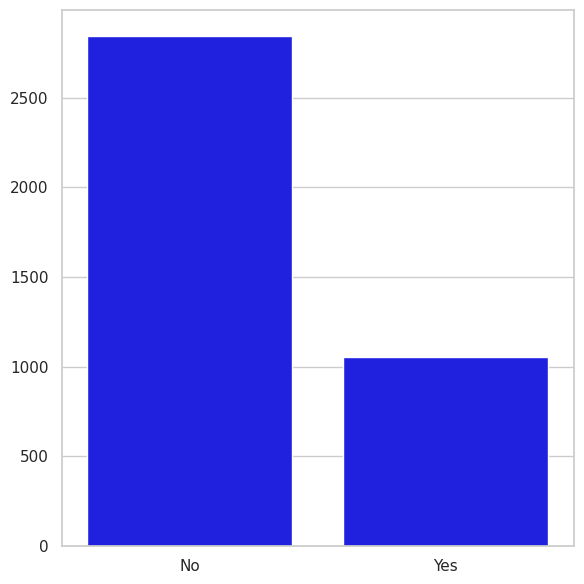

In [ ]:

ax1=sns.barplot(x=df['Subscription Status'].value_counts().index,
                 y=df['Subscription Status'].value_counts().values,
                 color = 'blue')
ax1.get_figure().set_size_inches(6,6)
plt.tight_layout()

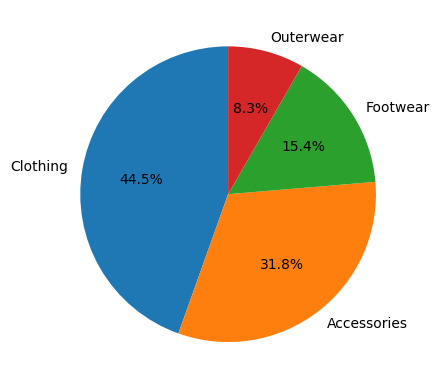

In [ ]:

fig1, ax1 = plt.subplots()

x = list(df['Category'].value_counts().index)
y = list(df['Category'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)

plt.show()

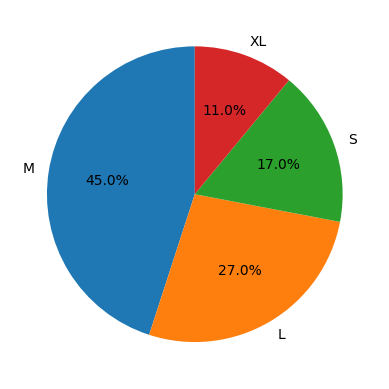

In [ ]:

fig1, ax1 = plt.subplots()

x = list(df['Size'].value_counts().index)
y = list(df['Size'].value_counts())
ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)

plt.show()

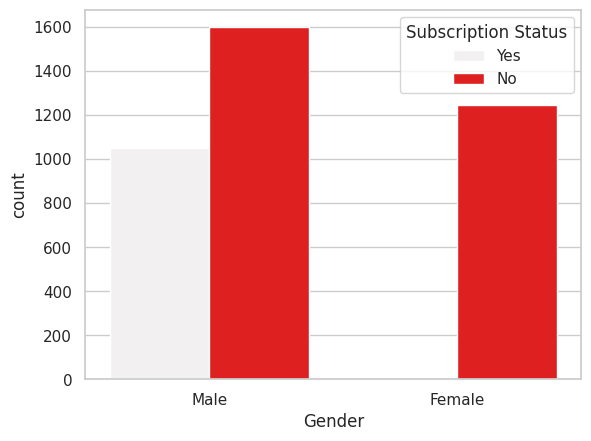

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Gender', hue = 'Subscription Status', data = df,
                  color = 'red')


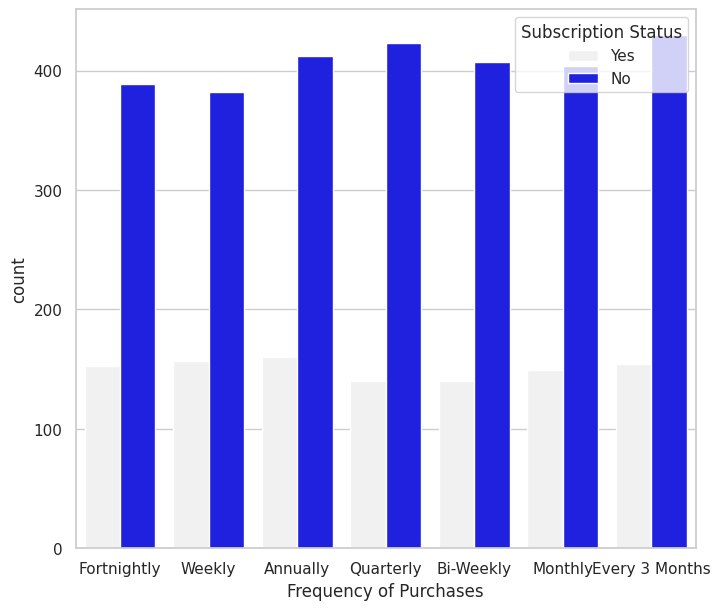

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Frequency of Purchases', hue = 'Subscription Status', data = df,
                  color = 'blue')


ax.get_figure().set_size_inches(8,7)

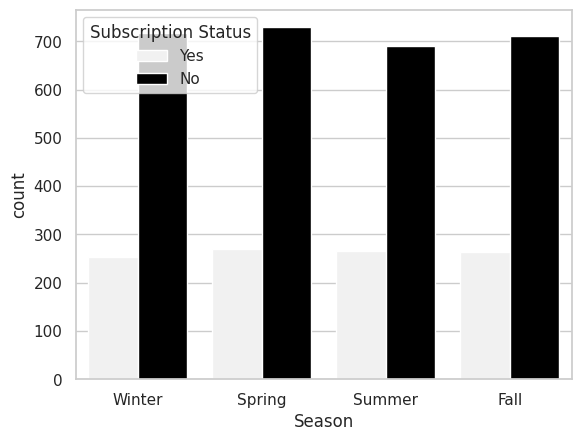

In [ ]:
sns.set(style="whitegrid")
ax2 = sns.countplot(x='Season', hue = 'Subscription Status', data = df,
                  color = 'black')


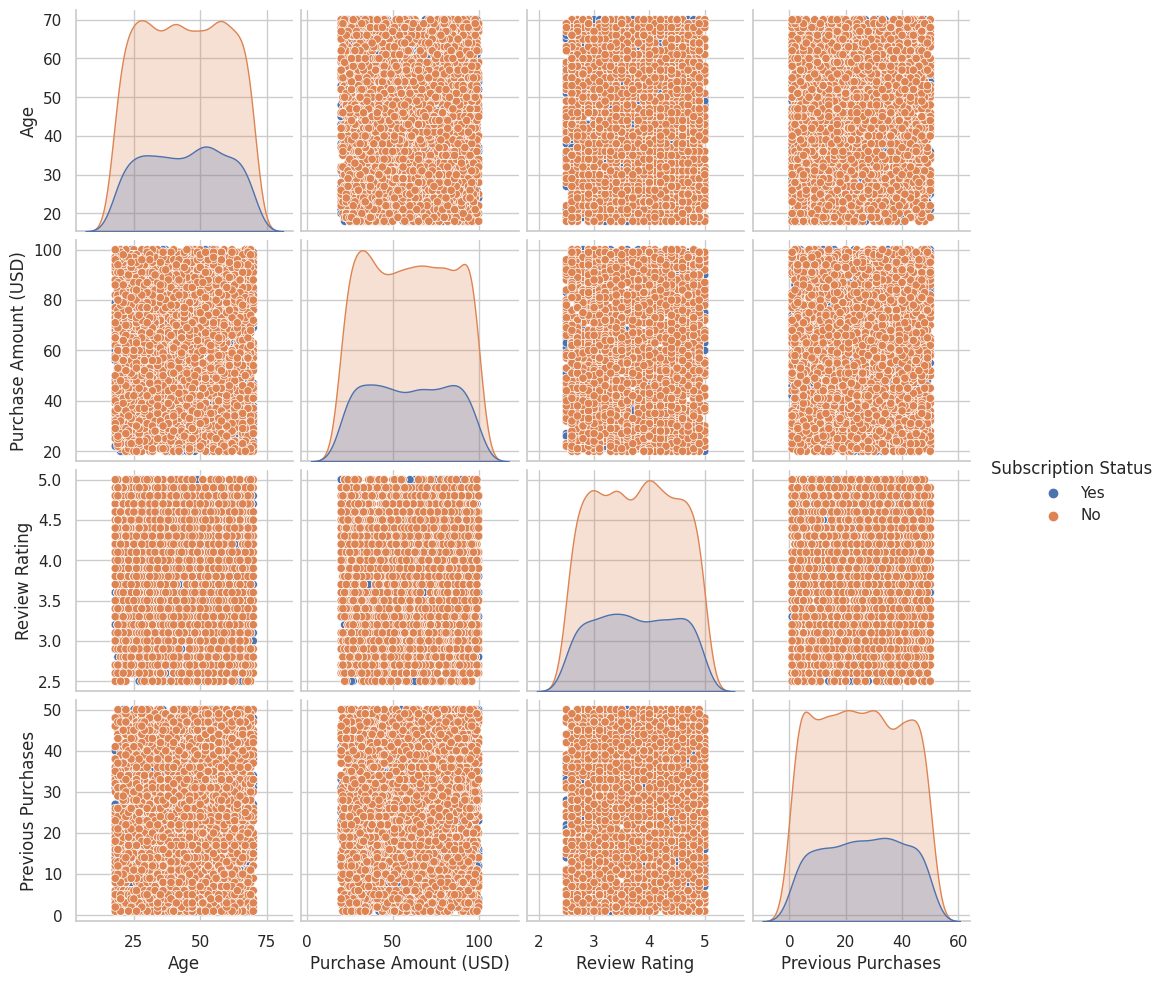

In [ ]:
g = sns.pairplot(df, hue = 'Subscription Status')

<Axes: xlabel='Frequency of Purchases', ylabel='count'>

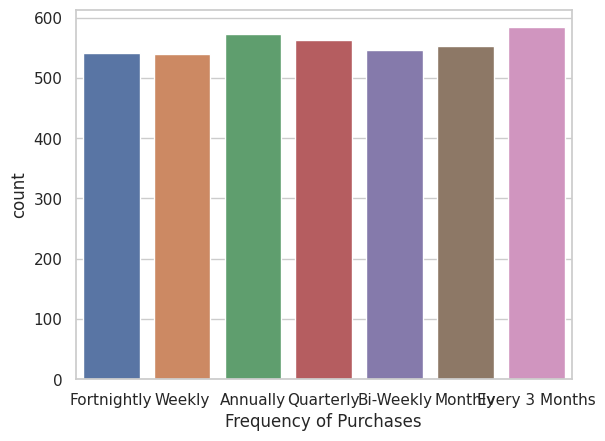

In [ ]:
sns.countplot(x='Frequency of Purchases',  data = df)

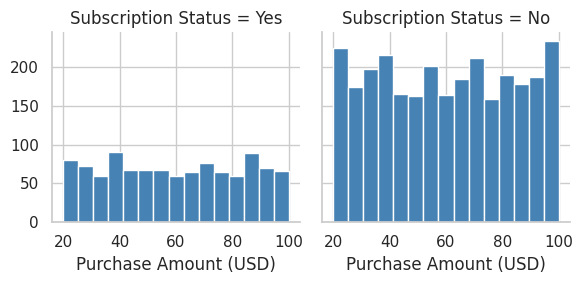

In [ ]:

sns.set(style="whitegrid")

g = sns.FacetGrid(df, col="Subscription Status", margin_titles=True)

ax  = g.map(plt.hist, "Purchase Amount (USD)", color="steelblue", bins = 15)

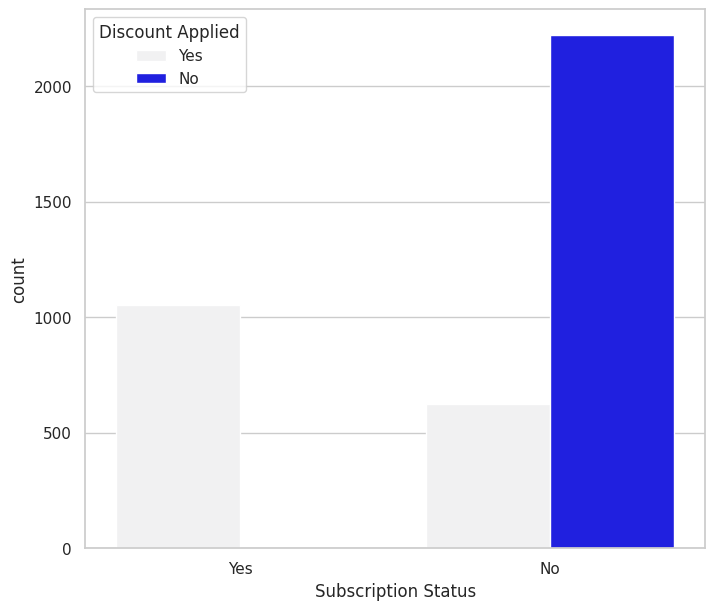

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Subscription Status', hue = 'Discount Applied', data = df,
                  color = 'blue')


ax.get_figure().set_size_inches(8,7)

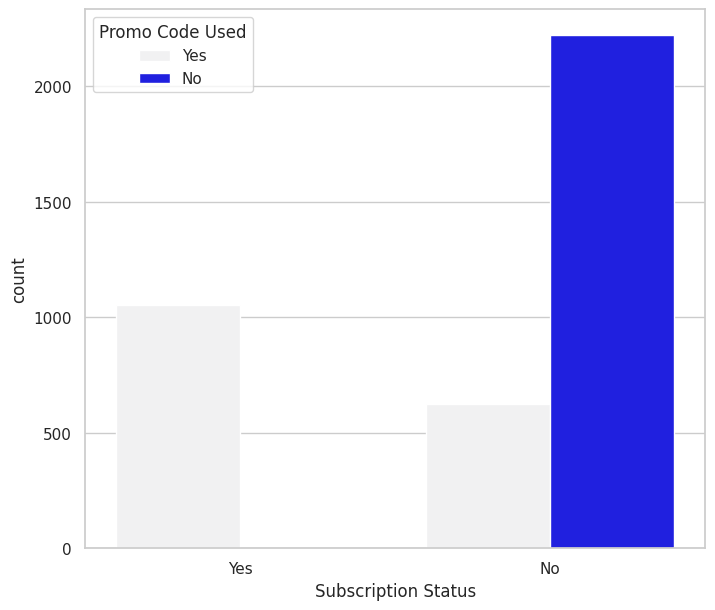

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Subscription Status', hue = 'Promo Code Used', data = df,
                  color = 'blue')


ax.get_figure().set_size_inches(8,7)

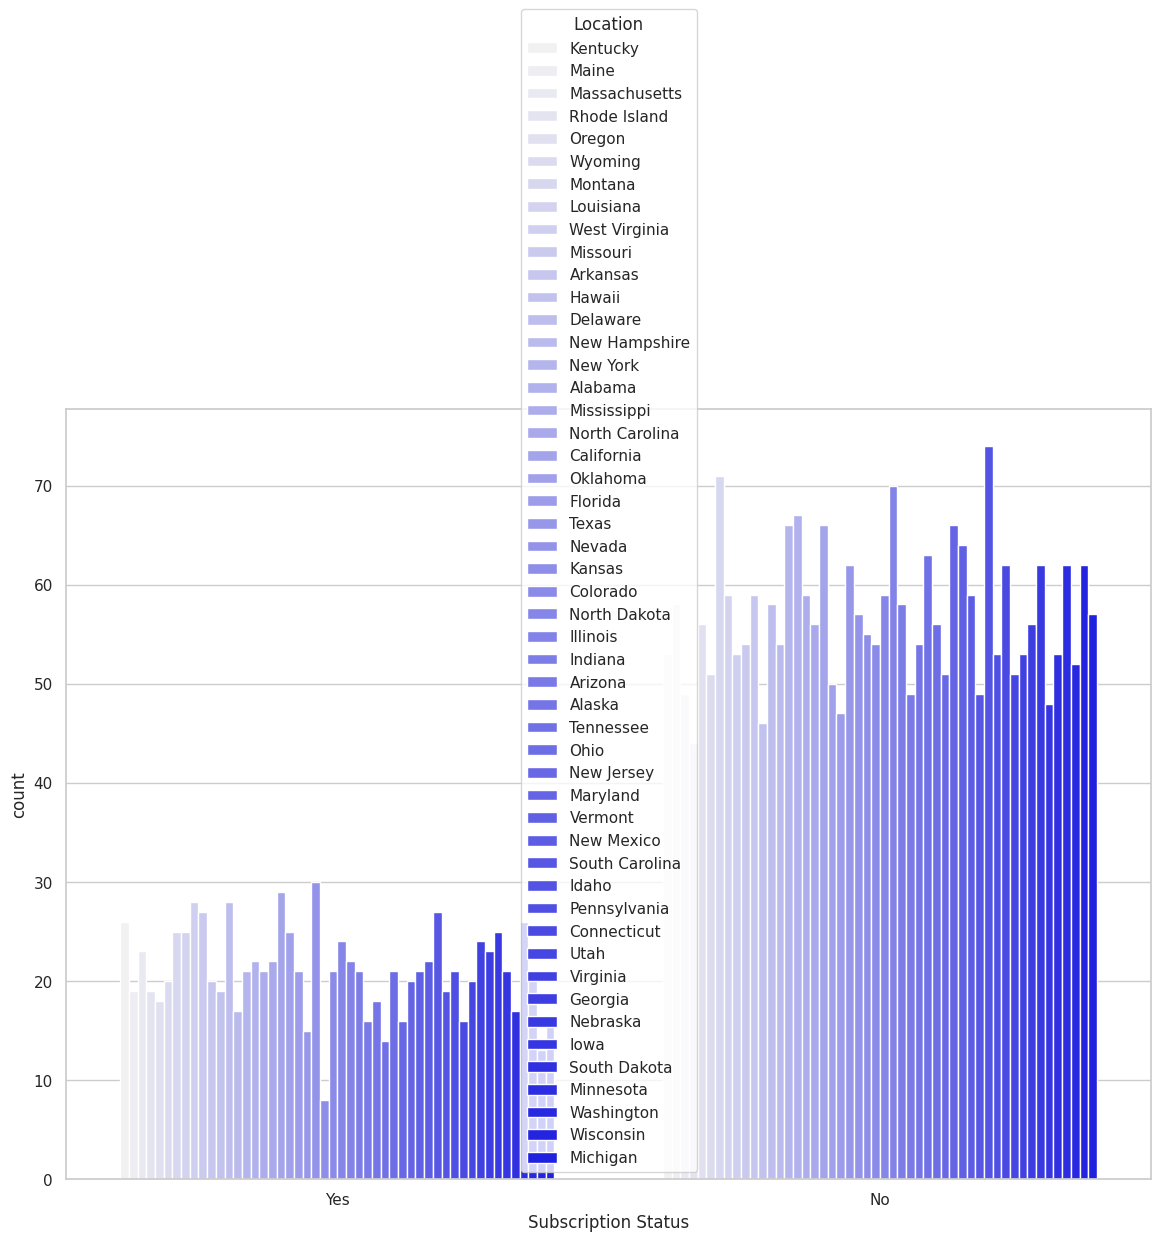

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Subscription Status', hue = 'Location', data = df,
                  color = 'blue')


ax.get_figure().set_size_inches(14,10)

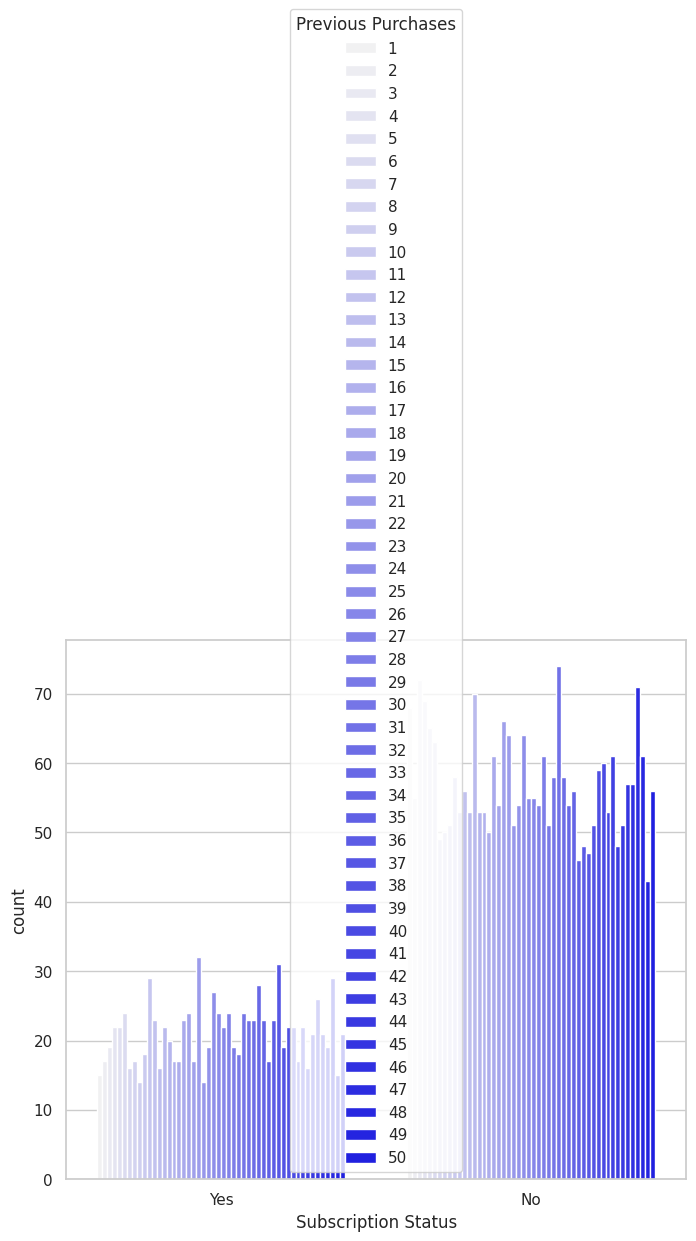

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Subscription Status', hue = 'Previous Purchases', data = df,
                  color = 'blue')


ax.get_figure().set_size_inches(8,7)

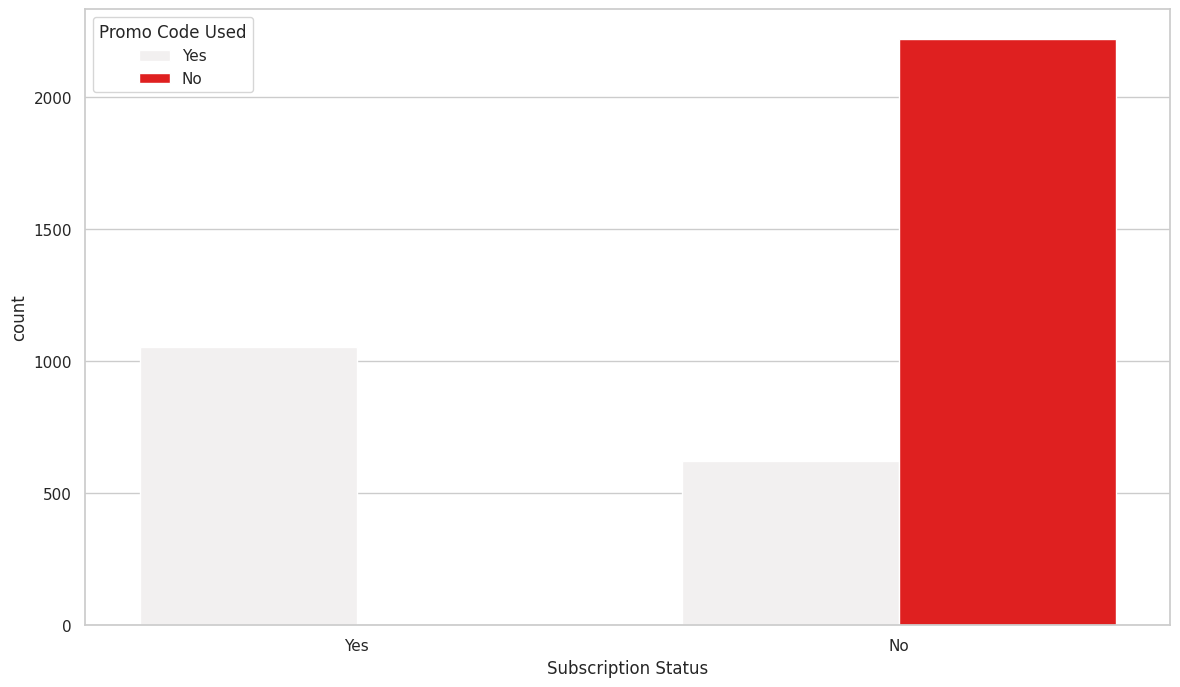

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Subscription Status', hue = 'Promo Code Used', data = df,
                  color = 'red')


ax.get_figure().set_size_inches(14,8)

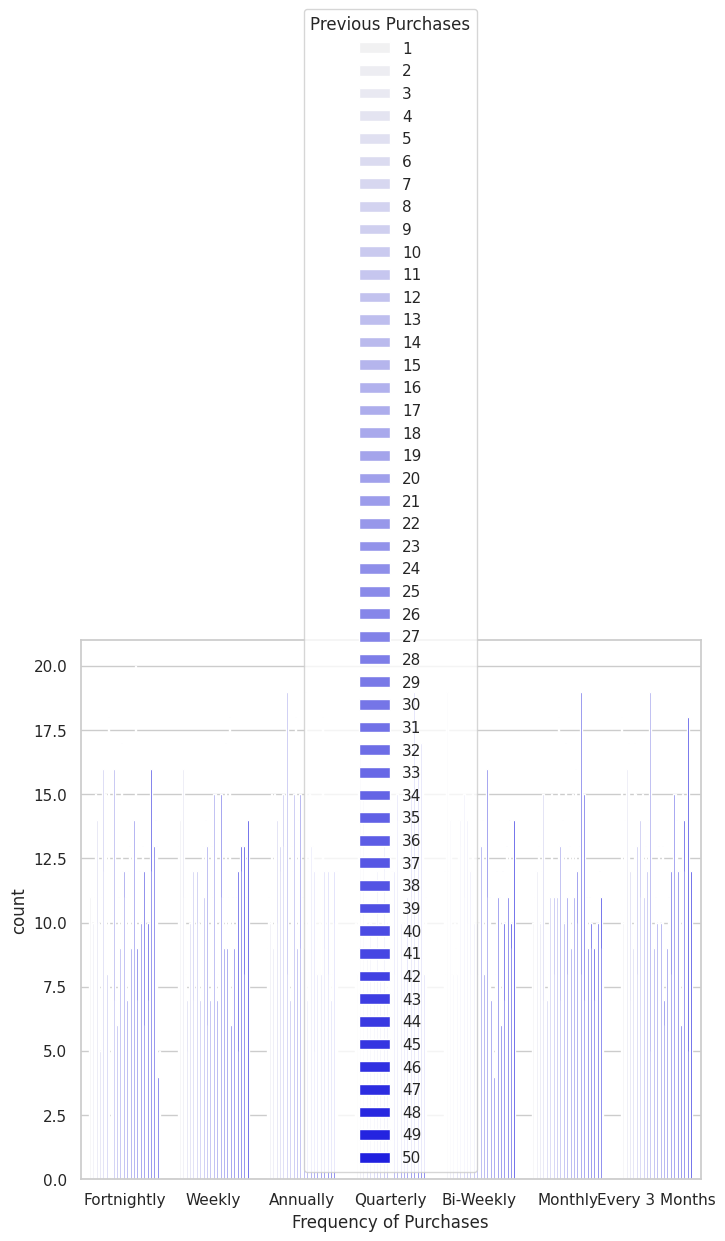

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Frequency of Purchases', hue = 'Previous Purchases', data = df,
                  color = 'blue')


ax.get_figure().set_size_inches(8,7)

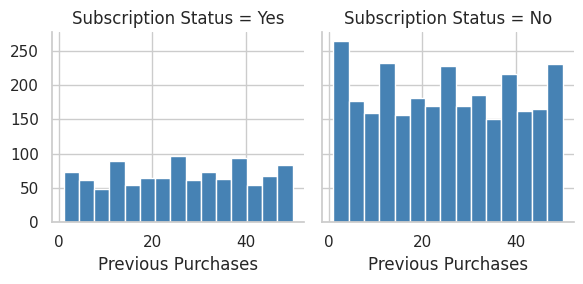

In [ ]:
#white background with grids
sns.set(style="whitegrid")

# divides the grid space based on a categorical variable
g = sns.FacetGrid(df, col="Subscription Status", margin_titles=True)

# plots the data
ax  = g.map(plt.hist, "Previous Purchases", color="steelblue", bins = 15)

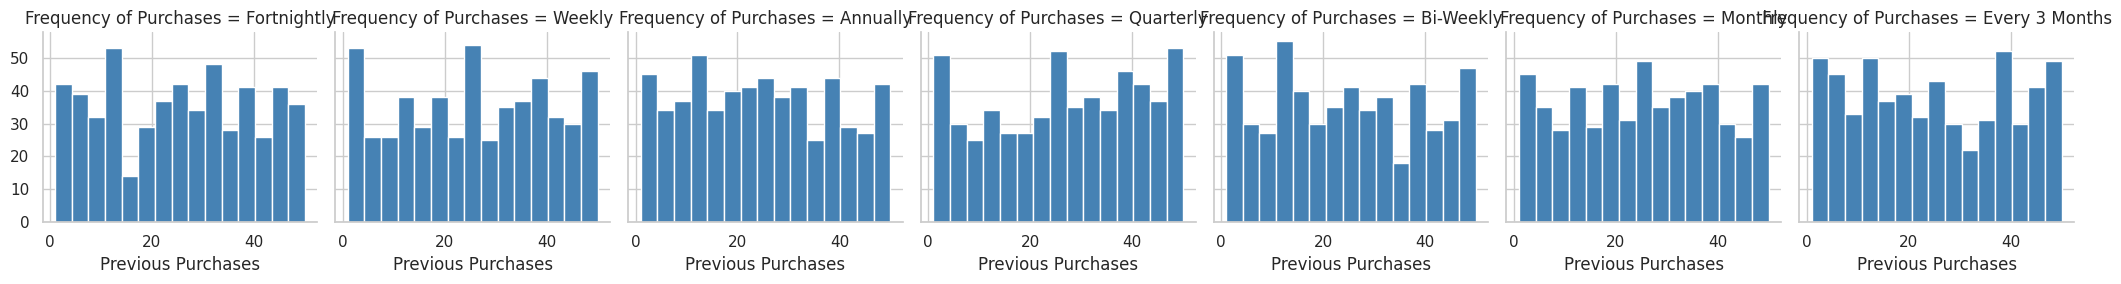

In [ ]:
#white background with grids
sns.set(style="whitegrid")

# divides the grid space based on a categorical variable
g = sns.FacetGrid(df, col="Frequency of Purchases", margin_titles=True)

# plots the data
ax  = g.map(plt.hist, "Previous Purchases", color="steelblue", bins = 15)

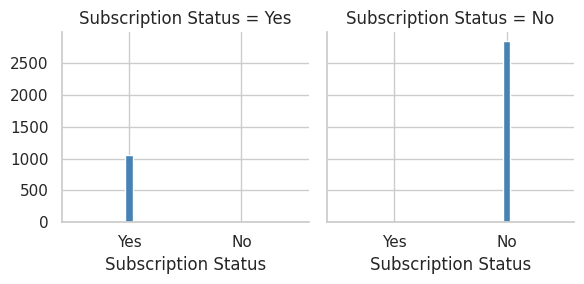

In [ ]:
#white background with grids
sns.set(style="whitegrid")

# divides the grid space based on a categorical variable
g = sns.FacetGrid(df, col="Subscription Status", margin_titles=True)

# plots the data
ax  = g.map(plt.hist, "Subscription Status", color="steelblue", bins = 15)

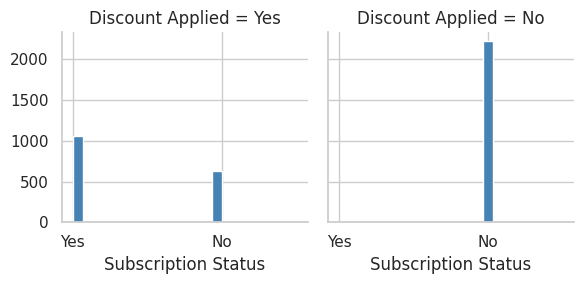

In [ ]:
#white background with grids
sns.set(style="whitegrid")

# divides the grid space based on a categorical variable
g = sns.FacetGrid(df, col="Discount Applied", margin_titles=True)

# plots the data
ax  = g.map(plt.hist, "Subscription Status", color="steelblue", bins = 15)

# **Scaling**

In [ ]:
from sklearn import preprocessing
array=df[numerical_variables].values
data_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
df[numerical_variables]=pd.DataFrame(data_scaler.fit_transform(array), columns=numerical_variables)
df[numerical_variables]

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.711538,0.4125,0.24,0.265306
1,0.019231,0.5500,0.24,0.020408
2,0.615385,0.6625,0.50,0.448980
3,0.057692,0.8750,0.40,0.979592
4,0.519231,0.3625,0.08,0.612245
...,...,...,...,...
3895,0.423077,0.1000,0.68,0.632653
3896,0.653846,0.3625,0.80,0.816327
3897,0.538462,0.1625,0.16,0.469388
3898,0.500000,0.7125,0.52,0.469388


# **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
new_col=[i+'_standardized' for i in numerical_variables]
array=df[numerical_variables].values
data_scaler=StandardScaler().fit(array)
df[new_col]=pd.DataFrame(data_scaler.transform(array))
df[new_col]

,Age_standardized,Purchase Amount (USD)_standardized,Review Rating_standardized,Previous Purchases_standardized
0,0.718913,-0.285629,-0.908241,-0.785831
1,-1.648629,0.178852,-0.908241,-1.616552
2,0.390088,0.558882,-0.000394,-0.162789
3,-1.517099,1.276716,-0.349566,1.637107
4,0.061263,-0.454531,-1.466916,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628116,0.460252
3896,0.521618,-0.454531,1.047122,1.083293
3897,0.127028,-1.130139,-1.187579,-0.093563
3898,-0.004502,0.727784,0.069440,-0.093563


# **Binarization**

In [ ]:
from sklearn.preprocessing import Binarizer
col_names = []
for i in numerical_variables:
    col_names.append(i + '_binarized')
array=df[numerical_variables].values
binarizer = Binarizer(threshold=0.5).fit(array)
Data_binarized = pd.DataFrame(binarizer.transform(array), columns = col_names)
Data_binarized

,Age_binarized,Purchase Amount (USD)_binarized,Review Rating_binarized,Previous Purchases_binarized
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
3895,0.0,0.0,1.0,1.0
3896,1.0,0.0,1.0,1.0
3897,1.0,0.0,0.0,0.0
3898,1.0,1.0,1.0,0.0


# **Encoding Categorical variables**

In [ ]:

categorical_variables =  list(df.drop(['Subscription Status'],axis=1).select_dtypes(include=object).columns)
dummy_cat_df = pd.get_dummies(df[categorical_variables], drop_first=True)
df = df.drop(categorical_variables, axis = 1)
df = pd.concat([df, dummy_cat_df], axis = 1)
df

,Age,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Age_standardized,Purchase Amount (USD)_standardized,Review Rating_standardized,Previous Purchases_standardized,Gender_Male,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.711538,0.4125,0.24,Yes,0.265306,0.718913,-0.285629,-0.908241,-0.785831,1,...,0,0,0,1,0,0,1,0,0,0
1,0.019231,0.5500,0.24,Yes,0.020408,-1.648629,0.178852,-0.908241,-1.616552,1,...,0,0,0,0,0,0,1,0,0,0
2,0.615385,0.6625,0.50,Yes,0.448980,0.390088,0.558882,-0.000394,-0.162789,1,...,1,0,0,0,0,0,0,0,0,1
3,0.057692,0.8750,0.40,Yes,0.979592,-1.517099,1.276716,-0.349566,1.637107,1,...,0,0,1,0,0,0,0,0,0,1
4,0.519231,0.3625,0.08,Yes,0.612245,0.061263,-0.454531,-1.466916,0.391025,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.423077,0.1000,0.68,No,0.632653,-0.267563,-1.341267,0.628116,0.460252,0,...,0,0,0,1,0,0,0,0,0,1
3896,0.653846,0.3625,0.80,No,0.816327,0.521618,-0.454531,1.047122,1.083293,0,...,0,0,0,0,1,0,0,0,0,0
3897,0.538462,0.1625,0.16,No,0.469388,0.127028,-1.130139,-1.187579,-0.093563,0,...,0,0,0,1,0,0,0,0,1,0
3898,0.500000,0.7125,0.52,No,0.469388,-0.004502,0.727784,0.069440,-0.093563,0,...,0,0,0,1,0,0,0,0,0,1


# **Fitting Models**

In [ ]:
input_var= set(df.columns)-set(['Subscription Status'])
X=df[input_var]
Y=df['Subscription Status']
df['Subscription Status'].isnull().value_counts()

<ipython-input-70-e80e0f639f08>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=df[input_var]


False    3900
Name: Subscription Status, dtype: int64

In [ ]:

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN']

# **Training Models**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=98)

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=15)

In [ ]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

# **Model Evaluation**

In [ ]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(X_test)

pred_Y_dt = dt.predict(X_test)

pred_Y_rf = rf.predict(X_test)

pred_Y_knn = knn.predict(X_test)

In [ ]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)


# accuracy, sensitivity, aand specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)


# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [ ]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn],
                    columns = ['accuracy'],
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt,
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.837607,0.844701,0.817365
Decision Trees,0.823621,0.845750,0.760479
Random Forest,0.796426,0.927597,0.422156
K-NN,0.775447,0.934942,0.320359
